Importing all the required library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

Reading the CSV file

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
pd.set_option('display.max_columns', None)
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
df.shape

(30000, 25)

From above we can observe that there are 30000 rows and 25 columns in our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

There lies a no null values in our dataframe

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


looking at the list of columns in our dataset

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
df_1 = df

Converting our Variable from numerical to string as the given columns are categorical in nature.

In [8]:
df_1[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df_1[['SEX', 'EDUCATION', 'MARRIAGE', 
                                                                                                    'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].astype(str)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

From above we can see that total nine columns are converted to object from numerical data type.

In [10]:
# Defining categorical plot 
def cat_plot(cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,frame):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(2,3, figsize=(20, 15))
    order = ['-2','-1','0','1','2','3','4','5','6','7','8']
    sns.countplot(ax=ax[0,0],x=cat_1, data=frame,order = order)
    sns.countplot(ax=ax[0,1],x=cat_2, data=frame,order = order)
    sns.countplot(ax=ax[0,2],x=cat_3, data=frame,order = order)
    sns.countplot(ax=ax[1,0],x=cat_4, data=frame,order = order)
    sns.countplot(ax=ax[1,1],x=cat_5, data=frame,order = order)
    sns.countplot(ax=ax[1,2],x=cat_6, data=frame,order = order)
    plt.show()

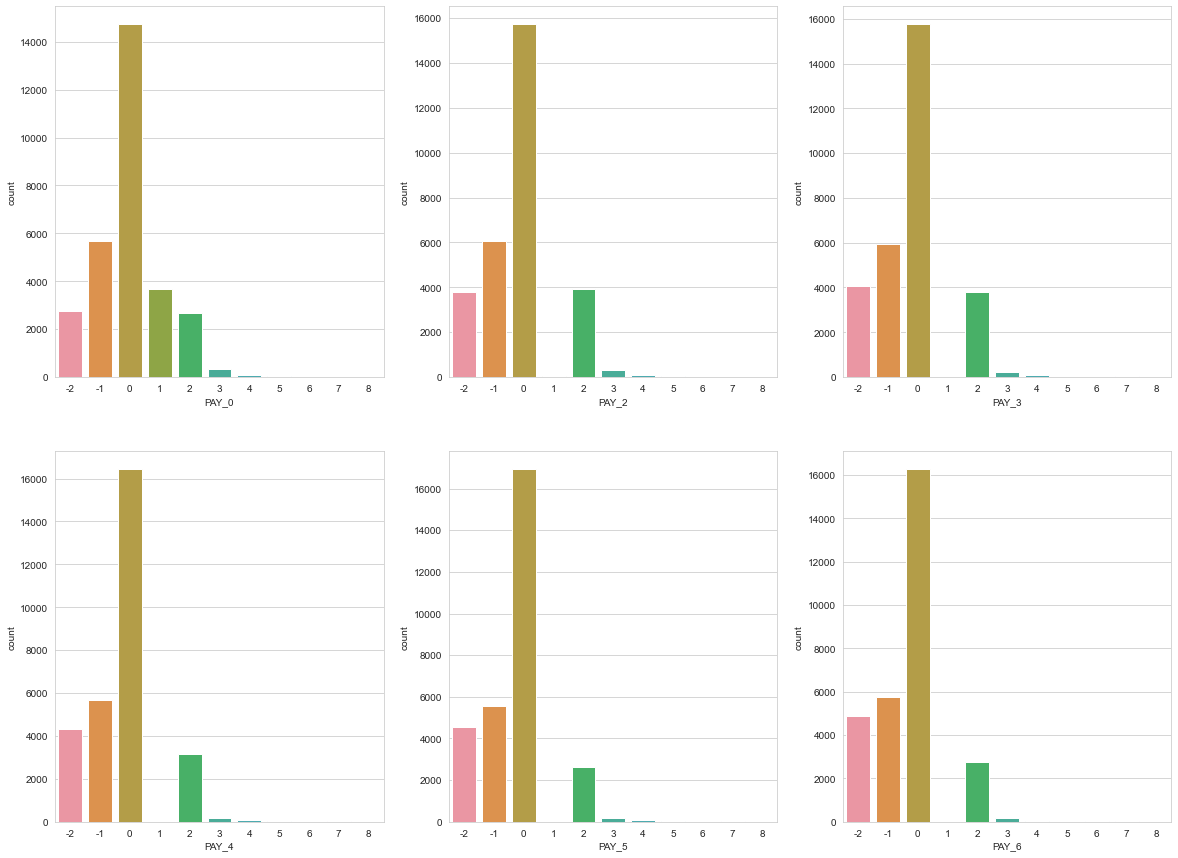

In [11]:
cat_plot('PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',df_1) 

#### From above barchart we can observe that there are around 25000 people who pays there credit bill duly or have negative credit bill. Now we will analyse the people who are having credit payment delay above one month

In [12]:
df_extract_sep = df_1[df_1['PAY_0'] == '0']

In [13]:
df_extract_sep.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0


In [14]:
df_extract_sep.shape

(14737, 25)

In [15]:
print('Client likely to get default:',round(100-len(df_extract_sep)/len(df)*100,4),'%')

Client likely to get default: 50.8767 %


From above we can see that 50.8767 % are amount of clients who has payment due of one or more than one month.

In [16]:
df_clean = df_extract_sep

Now we will analyse df_clean and will try to extract more relavant insight from it.

In [17]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,14737.0,15147.976861,8624.284124,3.0,7662.0,15390.0,22459.0,30000.0
LIMIT_BAL,14737.0,154265.025446,126832.537271,10000.0,50000.0,120000.0,220000.0,1000000.0
AGE,14737.0,34.976250,9.283228,21.0,28.0,33.0,41.0,79.0
BILL_AMT1,14737.0,78417.889462,82054.920294,260.0,22233.0,49605.0,104691.0,964511.0
BILL_AMT2,14737.0,74238.192509,79631.950670,-17710.0,20000.0,48261.0,99768.0,983931.0
BILL_AMT3,14737.0,69448.018864,77152.988173,-157264.0,18414.0,44938.0,93000.0,855086.0
BILL_AMT4,14737.0,62659.819231,72032.062252,-170000.0,16501.0,37298.0,84221.0,891586.0
BILL_AMT5,14737.0,57776.063921,67869.910535,-81334.0,14395.0,30671.0,78819.0,927171.0
BILL_AMT6,14737.0,55668.092285,66938.371831,-73895.0,11841.0,29782.0,77264.0,961664.0
PAY_AMT1,14737.0,6082.560019,14132.201296,0.0,1850.0,3000.0,6000.0,323014.0


In [18]:
df_one = df_clean[df_clean['default.payment.next.month'] == 1]
df_one['PAY_0'].unique(),df_one['default.payment.next.month'].unique()

(array(['0'], dtype=object), array([1], dtype=int64))

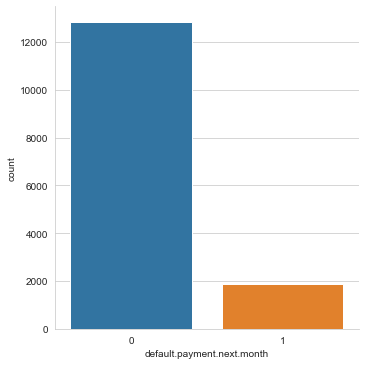

In [19]:
sns.catplot(x='default.payment.next.month', data = df_clean, kind='count')

From this we can observe that there are few people who has payed their all dues by month of september are still likely to get default. There can be several reason one can be like their credit history.

In [20]:
#Sorting the df_clean on basis of age
df_clean = df_clean.sort_values('AGE')
df_clean.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4485,4486,30000.0,1,2,2,21,0,0,0,0,0,0,26587.0,25917.0,17072.0,15994.0,12017.0,5614.0,1385.0,1270.0,367.0,336.0,112.0,0.0,0
21736,21737,30000.0,2,3,1,21,0,0,0,0,2,0,28884.0,25277.0,25289.0,25971.0,25350.0,5082.0,2091.0,1600.0,1600.0,301.0,102.0,40.0,0
4271,4272,10000.0,1,2,2,21,0,0,0,0,-1,-1,6703.0,8422.0,9205.0,9393.0,4176.0,0.0,2000.0,1000.0,188.0,2538.0,0.0,0.0,0
12350,12351,20000.0,1,2,2,21,0,0,0,-2,-2,-2,19030.0,19783.0,0.0,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0
21598,21599,30000.0,2,2,2,21,0,0,0,0,0,0,9696.0,10406.0,5068.0,2023.0,1163.0,0.0,2000.0,1000.0,1002.0,23.0,0.0,0.0,0
23927,23928,20000.0,1,6,2,21,0,0,0,0,0,-2,13203.0,4443.0,3259.0,2969.0,0.0,0.0,1036.0,1132.0,2000.0,0.0,0.0,0.0,0
6733,6734,20000.0,2,2,2,21,0,0,0,0,0,0,18770.0,18410.0,18821.0,19307.0,19260.0,20028.0,1400.0,1200.0,1000.0,6000.0,1000.0,5000.0,0
3308,3309,10000.0,2,2,2,21,0,0,0,0,0,0,7888.0,8987.0,9604.0,9800.0,10000.0,0.0,1383.0,1000.0,196.0,200.0,1000.0,0.0,0
21546,21547,20000.0,2,2,2,21,0,0,0,0,0,0,19039.0,19684.0,18825.0,19876.0,20040.0,17755.0,1286.0,1416.0,1467.0,631.0,730.0,0.0,0
20407,20408,10000.0,1,2,2,21,0,0,0,0,0,0,7427.0,8057.0,8749.0,9413.0,10534.0,10210.0,1200.0,1165.0,1079.0,1200.0,754.0,0.0,0


In [21]:
def rel_plot(data_1, data_2, frame, kind):
    sns.relplot(x=data_1, y=data_2, data=frame, kind=kind)
    plt.show()

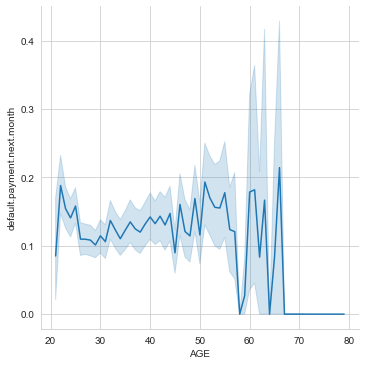

In [22]:
rel_plot('AGE','default.payment.next.month',df_clean, 'line')

In [23]:
def dist_plot(data, frame, hue, hue_1, hue_2, hue_3):
    fig, ax = plt.subplots(2,2,figsize=(24, 9))
    sns.set_style('whitegrid')
    sns.kdeplot(ax=ax[0,0], x=data, data=frame,hue=hue)
    sns.kdeplot(ax=ax[0,1], x=data, data=frame,hue=hue_1)
    sns.kdeplot(ax=ax[1,0], x=data, data=frame,hue=hue_2)
    sns.kdeplot(ax=ax[1,1], x=data, data=frame,hue=hue_3)
    plt.axvline(x=frame.AGE.median(),
            color='blue',
            ls='--', 
            lw=1.5)
    plt.axvline(x=frame.AGE.mean(),
            color='red',
            ls='dotted', 
            lw=1.5)
    plt.show()

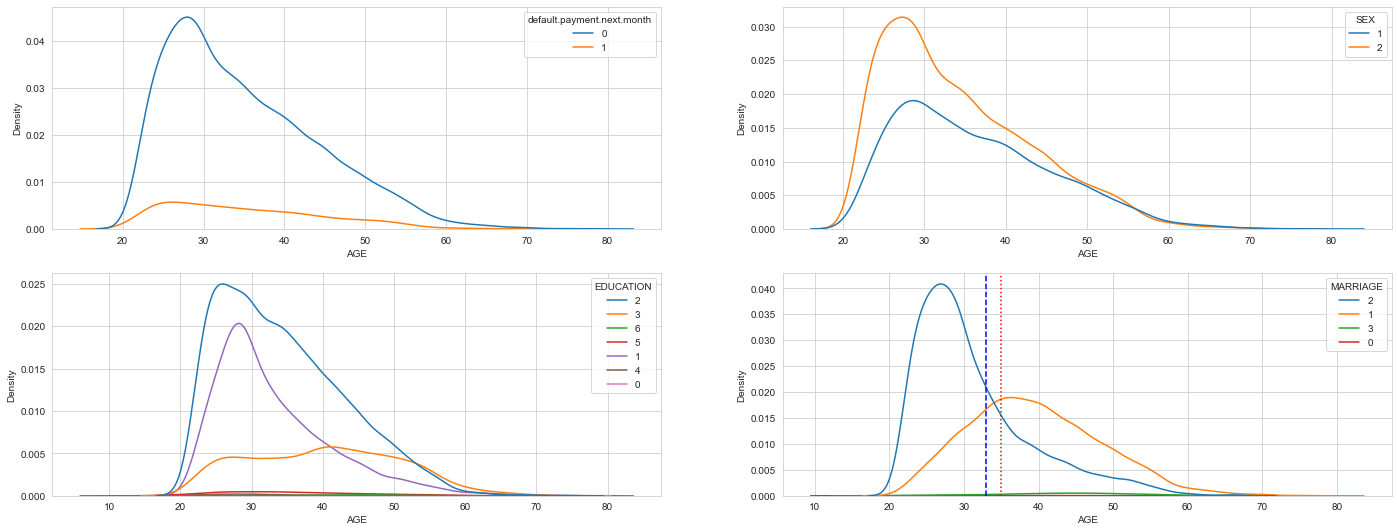

In [24]:
dist_plot('AGE', df_clean,'default.payment.next.month','SEX', 'EDUCATION', 'MARRIAGE')

From this plot we can observe that median age of people is 32 and mean of age people is 35

In [25]:
# 1 = male
# 2 = female

Females are using credit card in more amount

In [26]:
# 1=graduate school, 
# 2=university, 
# 3=high school, 
# 4=others,
# 5=unknown, 
# 6=unknown


#### Observation
In descending order
University -->  graduate --> High School --> unknown --> unknown --> others

In [27]:
# 1=married, 
# 2=single, 
# 3=others


#### Observation
Single --> married --> others

#### Now Trying to visualize the SEX, EDUCATION, MARRIAGE in regards to default payment

In [28]:
# def plot_default():
def point_plot(data, data_1, data_2, data_3, frame):
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(2,3, figsize=(20, 20), sharey=True)
    sns.barplot(ax=ax[0,0], x=data, y=data_3, data=df_clean)
    order_1 = ['0','1','2','3']
    sns.barplot(ax=ax[0,1],x=data_1, y=data_3, data=df_clean, order=order_1)
    order_2 = ['0','1','2','3','4','5','6']
    sns.barplot(ax=ax[0,2],x=data_2, y=data_3, data=df_clean, order = order_2)
    sns.pointplot(ax=ax[1,0], x=data, y=data_3, data=df_clean,color='red')
    sns.pointplot(ax=ax[1,1],x=data_1, y=data_3, data=df_clean, color='green', order=order_1)
    sns.pointplot(ax=ax[1,2],x=data_2, y=data_3, data=df_clean, color='blue', order=order_2)
    plt.show()

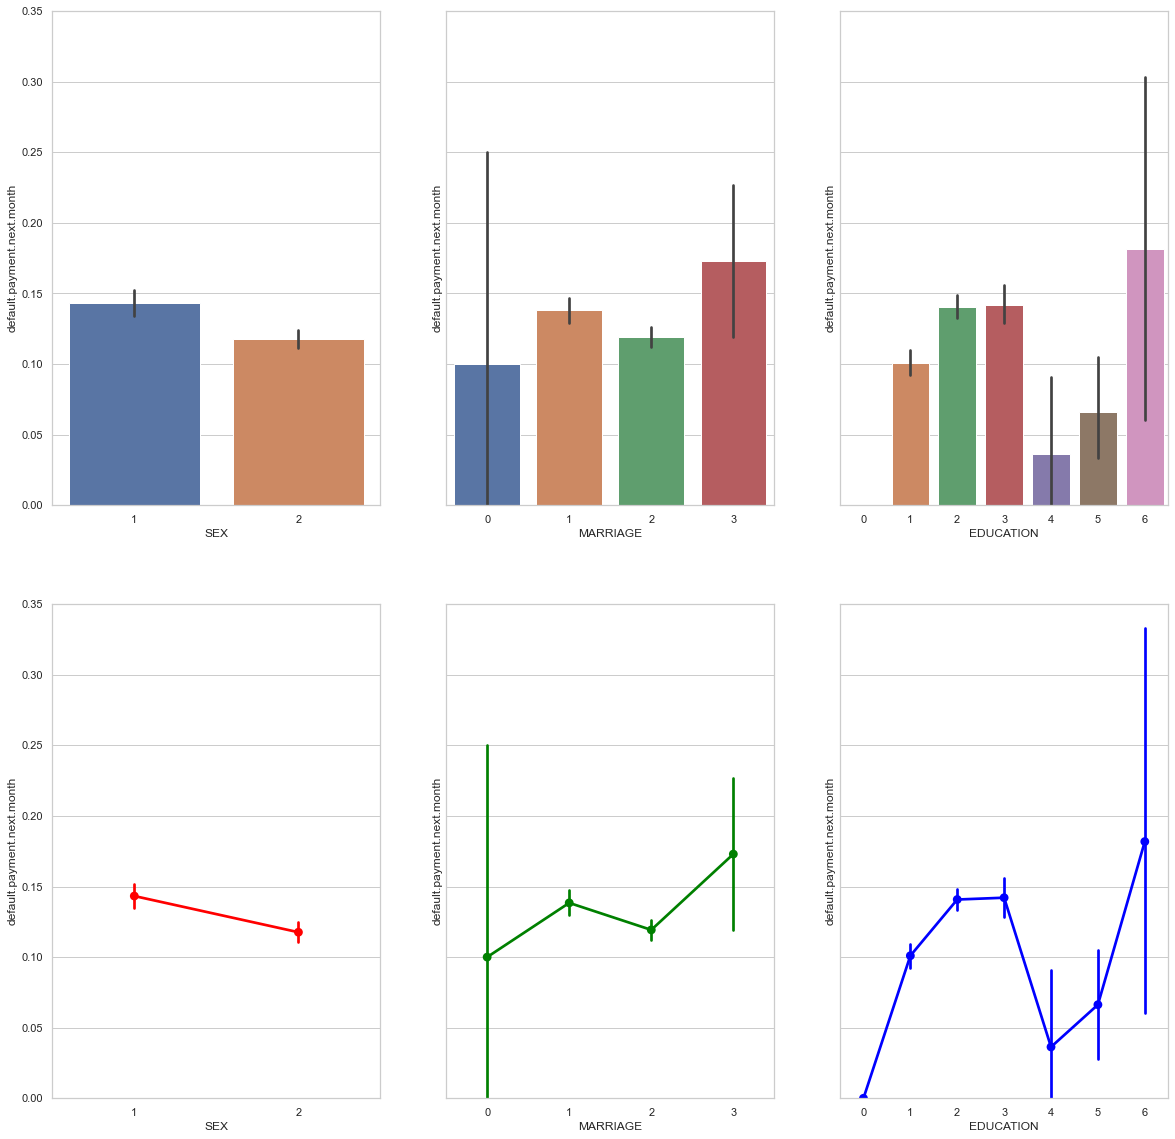

In [29]:
point_plot('SEX','MARRIAGE','EDUCATION','default.payment.next.month', df_clean)

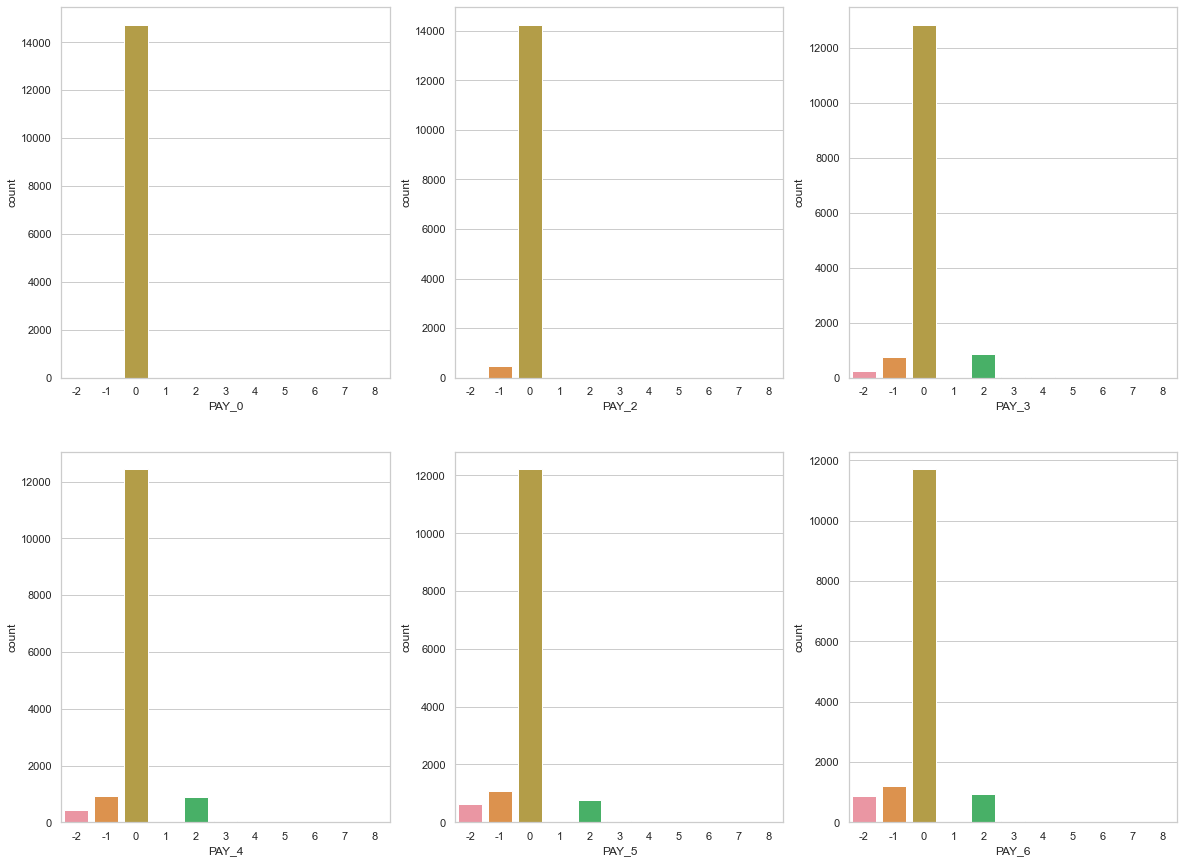

In [30]:
cat_plot('PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',df_clean)

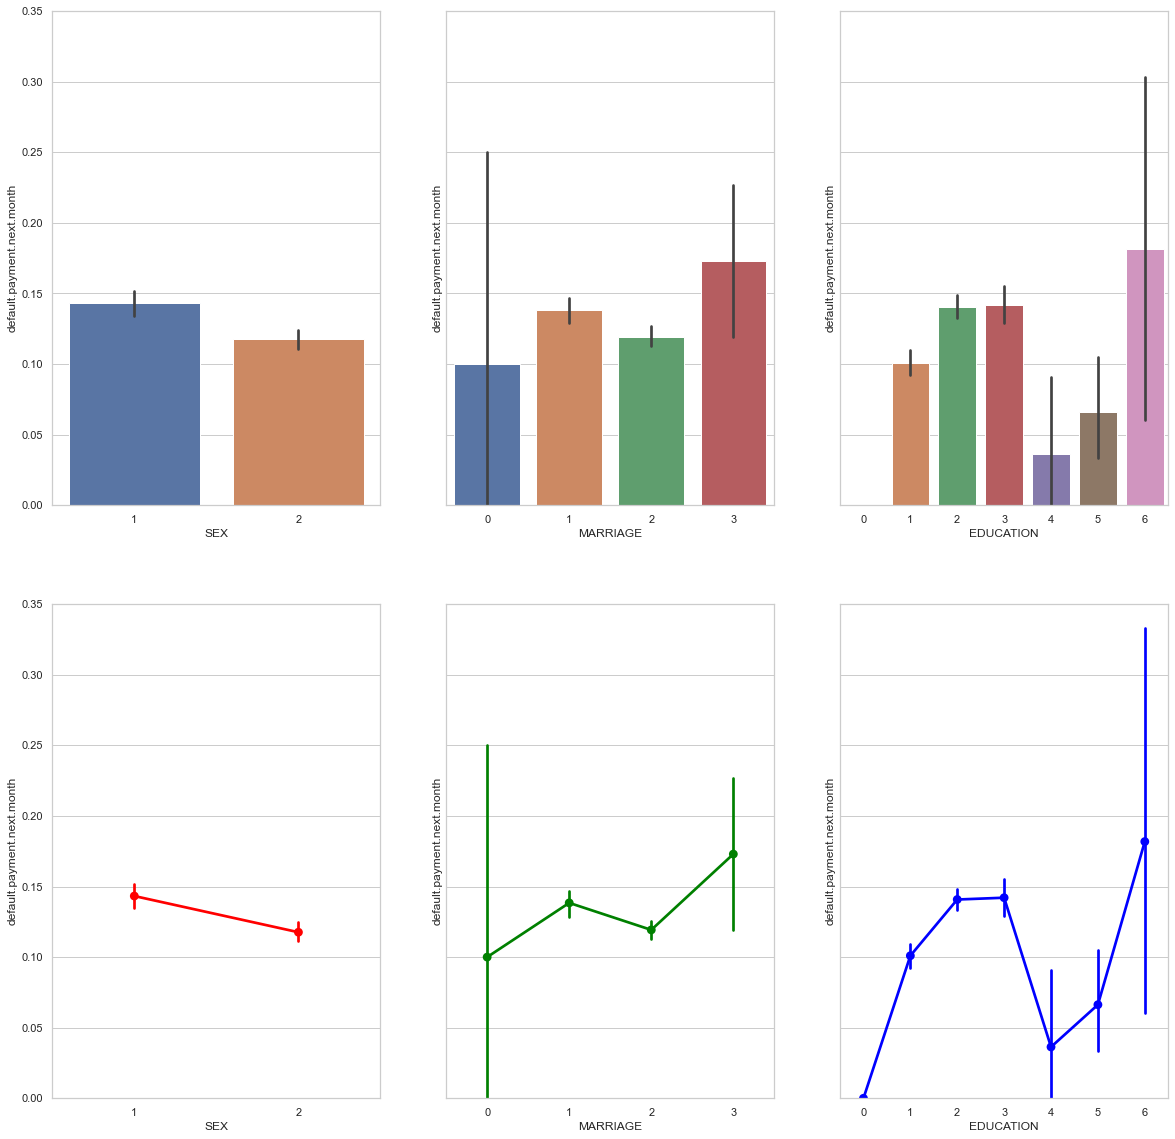

In [31]:
point_plot('SEX','MARRIAGE','EDUCATION','default.payment.next.month', df)

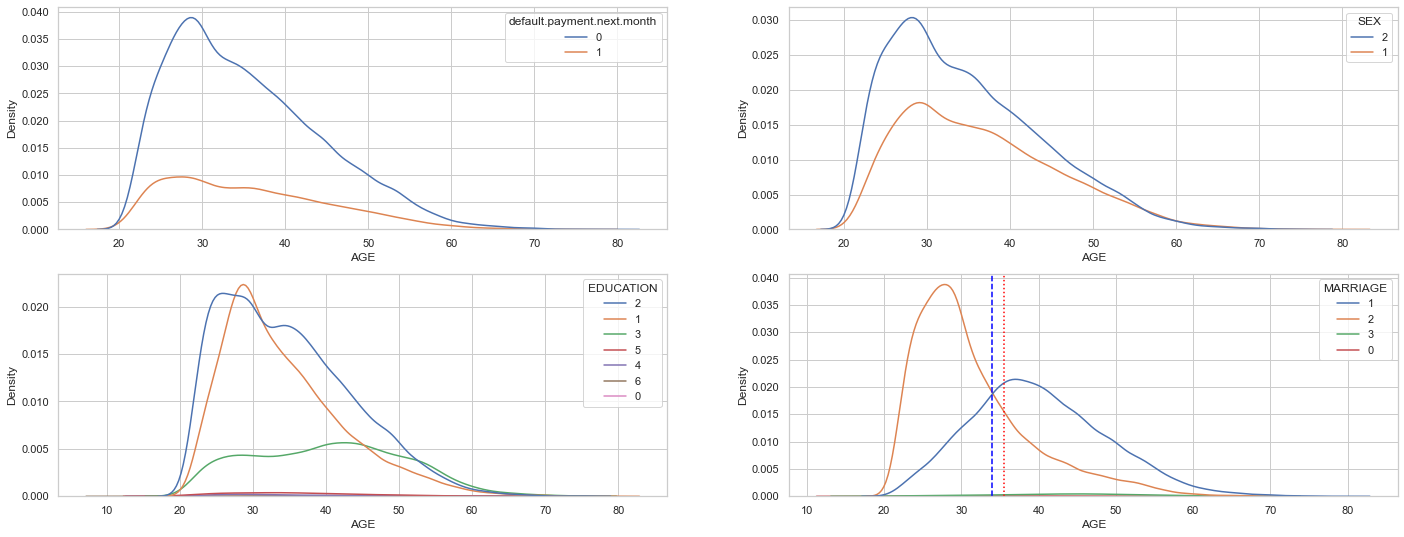

In [32]:
dist_plot('AGE', df,'default.payment.next.month','SEX', 'EDUCATION', 'MARRIAGE')

In [33]:
# Now we will try to observe which age group, SEX, Marriage, Education people are likely to get default

In [34]:
df_default = df_1[df_1['default.payment.next.month'] == 1]
df_default.shape

(6636, 25)

In [35]:
print('percentage of clients not likely to get default',100 - len(df_default)/len(df)*100,'%')
print('percentage of clients likely to get default',len(df_default)/len(df)*100,'%')

percentage of clients not likely to get default 77.88 %
percentage of clients likely to get default 22.12 %


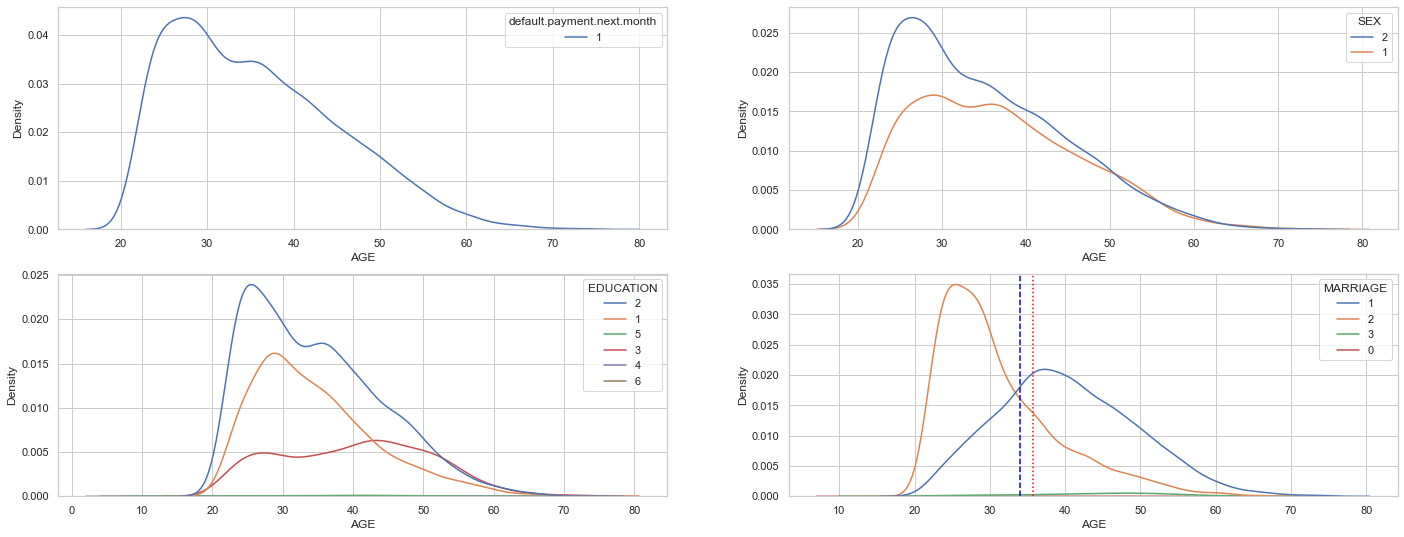

In [36]:
dist_plot('AGE', df_default,'default.payment.next.month','SEX', 'EDUCATION', 'MARRIAGE')

#### Inference
From above distribution plot we have following inference
1. females are more likely to get default
2. People with univeristy degree followoed by graduate school and high school are more likely to get default,
3. Singles are more likely to get default as compared to married.

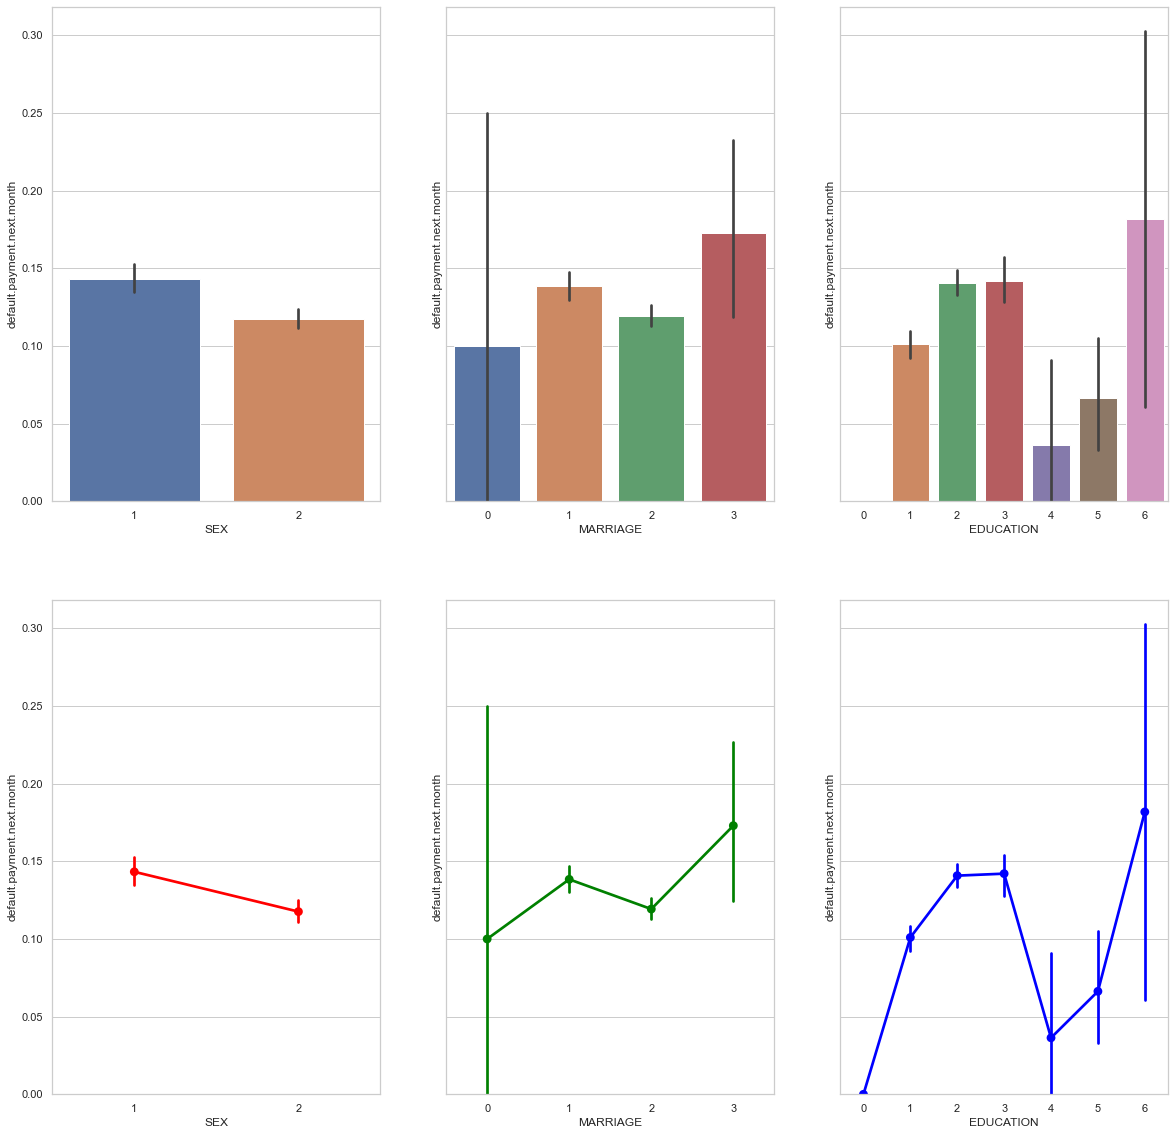

In [37]:
point_plot('SEX','MARRIAGE','EDUCATION','default.payment.next.month', df_default)

In [38]:
df_not_default = df_1[df_1['default.payment.next.month'] == 0]
df_not_default.shape

(23364, 25)

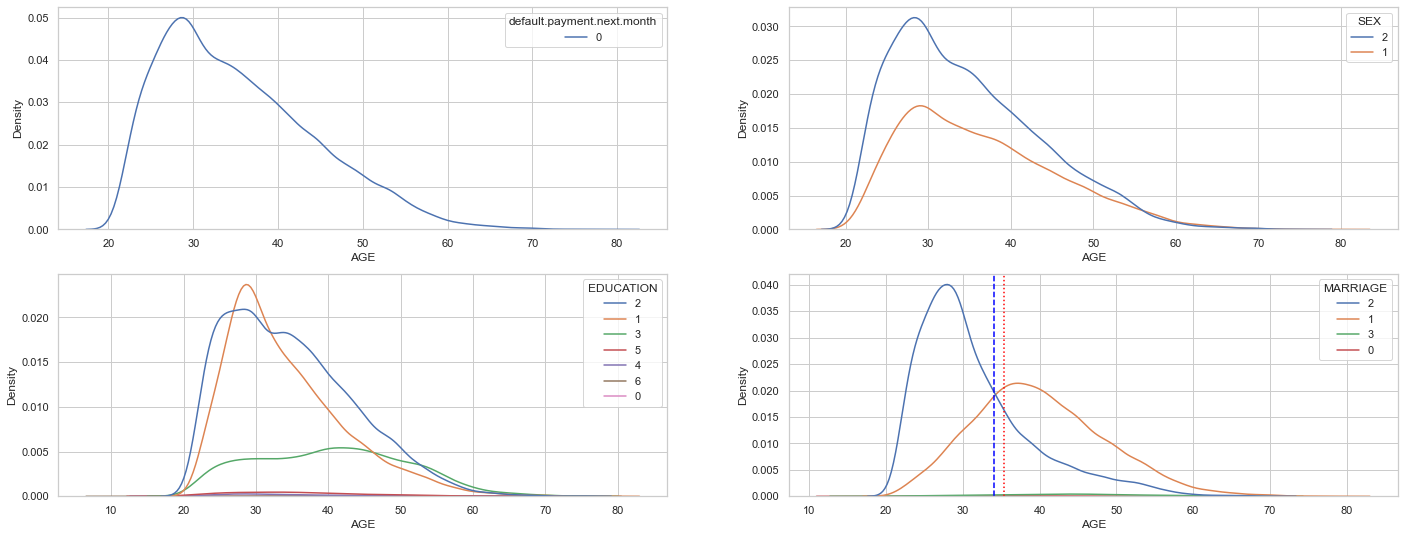

In [39]:
dist_plot('AGE', df_not_default,'default.payment.next.month','SEX', 'EDUCATION', 'MARRIAGE')

#### Inference from above distribution plots
following are the observation
1. Females are less likely to get default as compared to male
2. Peoples with graduate degree are more likely not to get default as compare to university followed by high school.
3. Singles are not likely to get default as compared to married.

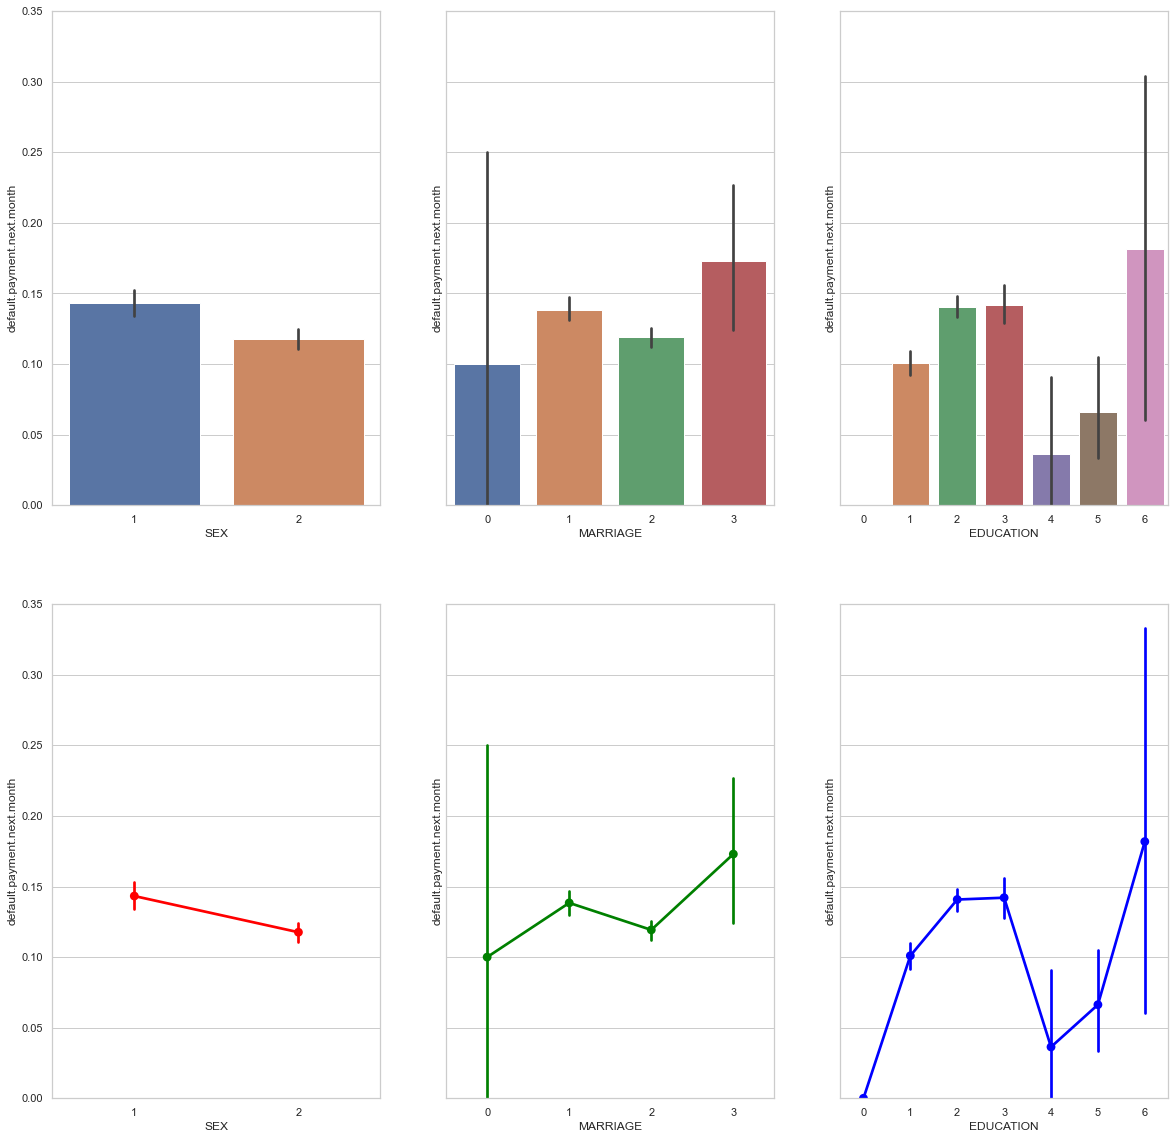

In [40]:
point_plot('SEX','MARRIAGE','EDUCATION','default.payment.next.month', df_not_default)

#### From above EDA we will only take following kinds of clients in developing Machine learning model
##### Education
Only People with High School, Graduate School and University
##### Marriage
Singles and married
##### Sex
Both male and female


In [41]:
subsetDataFrame = df_1[df_1['SEX'].isin(['1', '2']) & df_1['MARRIAGE'].isin(['2', '1']) & df_1['EDUCATION'].isin(['1', '2', '3'])]
subsetDataFrame.shape

(29163, 25)

Out of 30000 data points we now have only 29163 data points, which will not make any substantial difference into our model 

In [42]:
print(subsetDataFrame.SEX.unique())
print(subsetDataFrame.MARRIAGE.unique())
print(subsetDataFrame.EDUCATION.unique())

['2' '1']
['1' '2']
['2' '1' '3']


Here We have binary classifiaction problem, therefore we will choose three types of ML model
1. logistic regression
2. Support Vector Machine
3. Decision tree Classification
4. Convolution Neural Netwrok

    As per our current understanding we do not require any columns which tells about payment and bill therefore we will drop certain columns

In [43]:
subsetDataFrame.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [44]:
subsetDataFrame = subsetDataFrame.drop(columns=['ID', 'LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
                                                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                                'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
subsetDataFrame.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,2,2,1,24,2,2,-1,-1,-2,-2,1
1,2,2,2,26,-1,2,0,0,0,2,1
2,2,2,2,34,0,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0,0


Now we will One hot encode all the columns

In [45]:
#categorical data
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 
                                   'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6']
df_enc = pd.get_dummies(subsetDataFrame, columns = categorical_cols)
df_enc.head()

,default.payment.next.month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,AGE_21,AGE_22,AGE_23,AGE_24,AGE_25,AGE_26,AGE_27,AGE_28,AGE_29,AGE_30,AGE_31,AGE_32,AGE_33,AGE_34,AGE_35,AGE_36,AGE_37,AGE_38,AGE_39,AGE_40,AGE_41,AGE_42,AGE_43,AGE_44,AGE_45,AGE_46,AGE_47,AGE_48,AGE_49,AGE_50,AGE_51,AGE_52,AGE_53,AGE_54,AGE_55,AGE_56,AGE_57,AGE_58,AGE_59,AGE_60,AGE_61,AGE_62,AGE_63,AGE_64,AGE_65,AGE_66,AGE_67,AGE_68,AGE_69,AGE_70,AGE_71,AGE_72,AGE_73,AGE_74,AGE_75,AGE_79,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
df_enc.shape

(29163, 128)

In [47]:
X = df_enc.drop(columns=['default.payment.next.month'])
y = df_enc['default.payment.next.month']

In [48]:
len(y)

29163

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

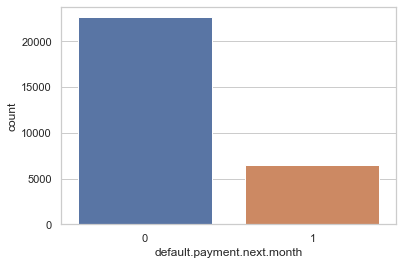

In [49]:
sns.countplot(x='default.payment.next.month', data=df_enc)

From above data we can observe that target variable is highly imbalance. Therfore we will try to make our target variable in balanced format.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, shuffle=True)
rus = RandomUnderSampler(random_state=3, 
                         sampling_strategy={0:15197, 1:4342})


X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Check class counts
Counter(y_rus)


Counter({0: 15197, 1: 4342})

In [51]:
# Randomly oversample the smaller classes
smote = SMOTE(random_state=3, sampling_strategy={0:16408, 1:16408})

X_train, y_train = smote.fit_resample(X_rus, y_rus)

# Check class counts
Counter(y_train)

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (16408) in class 0 will be larger than the number of samples in the majority class (class #0 -> 15197)
  warnings.warn(
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (16408) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15197)
  warnings.warn(


Counter({0: 16408, 1: 16408})

In [52]:
rus_1 = RandomUnderSampler(random_state=3, 
                         sampling_strategy={0:7452, 1:2172})
X_test, y_test = rus_1.fit_resample(X_test, y_test)

# Check class counts
Counter(y_test)

Counter({0: 7452, 1: 2172})

In [53]:
smote = SMOTE(random_state=3, sampling_strategy={0:16408, 1:16408})

X_test, y_test = smote.fit_resample(X_test, y_test)

# Check class counts
Counter(y_test)

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (16408) in class 0 will be larger than the number of samples in the majority class (class #0 -> 7452)
  warnings.warn(
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (16408) in class 1 will be larger than the number of samples in the majority class (class #0 -> 7452)
  warnings.warn(


Counter({0: 16408, 1: 16408})

In [54]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [55]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, shuffle=True)

#### Logistic Regression

In [56]:
def logistic_regression(C, penalty, verbose, Xtrain, ytrain, Xtest):
    clf = LogisticRegression(penalty=penalty, C=C, verbose=verbose)
    clf.fit(Xtrain,ytrain)
    clf_pred = clf.predict(Xtest)
    clf_prob = clf.predict_proba(Xtest)
    return {'prediction':clf_pred, 'probability':clf_prob}

In [57]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
clf_pred = clf.predict(X_test)
print(clf_pred)

[0 0 0 ... 0 1 1]


In [59]:
def reports(y_test, pred):
    cm7 = confusion_matrix(y_test, pred)
    cr = classification_report(y_test, pred)
    logreg=accuracy_score(y_test,clf_pred)
    logreg_roc = roc_auc_score(y_test,clf_pred)
    dict_ionary = {'confusion_metrics': cm7, 
                   'classification_report': cr, 
                   'log_reg':logreg, 
                   'logreg_roc':logreg_roc, 
                   'fpr':fpr, 
                   'tpr':tpr}
    return dict_ionary

    

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
cm7 = confusion_matrix(y_test, clf_pred)
print(cm7)

[[11823  4585]
 [ 4416 11992]]


In [61]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     16408
           1       0.72      0.73      0.73     16408

    accuracy                           0.73     32816
   macro avg       0.73      0.73      0.73     32816
weighted avg       0.73      0.73      0.73     32816



In [64]:
logreg_roc=accuracy_score(y_test,clf_pred)
logreg_roc

0.7257130667966846

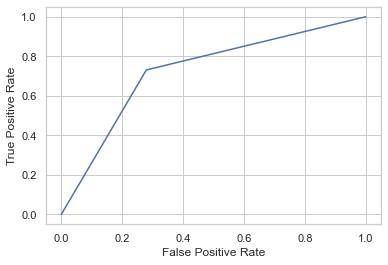

In [65]:
fpr, tpr, _ = roc_curve(y_test,clf_pred)
plt.plot(fpr,tpr, label="data 1, auc="+str(logreg_roc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In this type of case true positive rate is important for us, therfore we will try to improve the true positive rate

In [66]:
# Hyperparameter tuning for logistic regression
parameters_lr = [{'penalty':['l1','l2', 'elasticnet'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = clf,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose = 3,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77518098        nan        nan 0.77789318        nan
        nan 0.77871577        nan        nan 0.77938606        nan
        nan 0.77923368        nan        nan 0.77920321        nan
        nan 0.77917273        nan]
  warnings.warn(


Best Accuracy of LR: 77.94 %
Best Parameter of LR: {'C': 1, 'penalty': 'l2'}


C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
logistic_regression(100,'l2',5,X_train,y_train,X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


{'prediction': array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 'probability': array([[7.12396095e-01, 2.87603905e-01],
        [7.08441261e-01, 2.91558739e-01],
        [7.07505658e-01, 2.92494342e-01],
        ...,
        [5.75215780e-01, 4.24784220e-01],
        [4.01337084e-01, 5.98662916e-01],
        [4.76984119e-09, 9.99999995e-01]])}

In [68]:
clf = logistic_regression(100,'l2',5,X_train,y_train,X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


In [69]:
print(clf['prediction'])

[0 0 0 ... 0 1 1]


In [70]:
results = reports(y_test, clf_pred)

In [71]:
print(results['confusion_metrics'])

[[11823  4585]
 [ 4416 11992]]


In [72]:
print(results['classification_report'])

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     16408
           1       0.72      0.73      0.73     16408

    accuracy                           0.73     32816
   macro avg       0.73      0.73      0.73     32816
weighted avg       0.73      0.73      0.73     32816



In [73]:
print(results['log_reg']*100)

72.57130667966845


In [74]:
print(results['logreg_roc'])

0.7257130667966845


Our accuracy on the tuned on test data is 78% while on train data is 73%. It seems our model is generalized, and there precision and recall score is balanced.

### Linear Discriminant Analysis

In [75]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_test,y_test)

LinearDiscriminantAnalysis()

In [76]:
lda.explained_variance_ratio_

array([1.])

In [77]:
y_pred = lda.predict(X_test)

In [78]:
print(accuracy_score(y_test,y_pred))

0.6806131155533885


In [79]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13365  3043]
 [ 7438  8970]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.72     16408
           1       0.75      0.55      0.63     16408

    accuracy                           0.68     32816
   macro avg       0.69      0.68      0.67     32816
weighted avg       0.69      0.68      0.67     32816



Accuracy of LDA is 68%, and has wide difference in precision and recall score of classification variable 0 and 1.

### Support Vector Machine

In [80]:
# clf = SVC(kernel='linear')
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print(accuracy_score(y_test,y_pred))

In [81]:
# kernels = ['linear', 'rbf', 'poly']
# for kernel in kernels:
#   svc = SVC(kernel=kernel).fit(X_train, y_train)

### Randomforest for classification

In [82]:
forest1 = RandomForestClassifier()
forest1.fit(X_train, y_train)

train_pred = forest1.predict(X_test)

results = reports(y_test, train_pred)

In [83]:
print(results['confusion_metrics'])

[[11084  5324]
 [ 3508 12900]]


In [84]:
print(results['classification_report'])

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     16408
           1       0.71      0.79      0.74     16408

    accuracy                           0.73     32816
   macro avg       0.73      0.73      0.73     32816
weighted avg       0.73      0.73      0.73     32816



In [85]:
params = {'n_estimators': [10, 100],
          'max_features': [30, 40, 54, 75, 90, 128],
          'max_depth': [20, 25, 35]}

grid_forest1 = GridSearchCV(forest1, params, cv=3, n_jobs=-1)

grid_forest1.fit(X_train, y_train)

C:\Users\Harshit Panchal\.conda\envs\textenv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78705607 0.79004229 0.78522768 0.78748255 0.78428294 0.78736072
 0.78455715 0.78516669 0.77895023 0.78312511        nan        nan
 0.79881875 0.80174405 0.79205367 0.80018995 0.79275452 0.79994617
 0.79269365 0.79817876 0.7910176  0.7960152         nan        nan
 0.81073397 0.81710278 0.81070348 0.81478682 0.81009401 0.81423838
 0.80655923 0.80988063 0.80195775 0.8110082         nan        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 35],
                         'max_features': [30, 40, 54, 75, 90, 128],
                         'n_estimators': [10, 100]})

In [86]:
print('Best score:', grid_forest1.best_score_)
print('Best params:', grid_forest1.best_params_)

Best score: 0.817102780545694
Best params: {'max_depth': 35, 'max_features': 30, 'n_estimators': 100}


In [87]:
y_pred = grid_forest1.predict(X_test)
results = reports(y_test, y_pred)
print(results['confusion_metrics'])
print(results['classification_report'])

[[11983  4425]
 [ 4113 12295]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     16408
           1       0.74      0.75      0.74     16408

    accuracy                           0.74     32816
   macro avg       0.74      0.74      0.74     32816
weighted avg       0.74      0.74      0.74     32816



In random forest our accuracy on train dataset is 82% and on test dataset is 74% which is highly regardable.

### Neural Network

In [88]:
len(X), len(y)

(29163, 29163)

In [89]:
X.shape, y.shape

((29163, 127), (29163,))

Here we have developed various neuarl network to get substantial accuracy

In [90]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1026/1026 [==============================] - 4s 3ms/step - loss: 7.9376 - accuracy: 0.4775
Epoch 2/5
1026/1026 [==============================] - 3s 3ms/step - loss: 7.6627 - accuracy: 0.4974
Epoch 3/5
1026/1026 [==============================] - 3s 3ms/step - loss: 7.6402 - accuracy: 0.4990
Epoch 4/5
1026/1026 [==============================] - 3s 3ms/step - loss: 7.6402 - accuracy: 0.4990
Epoch 5/5
1026/1026 [==============================] - 3s 3ms/step - loss: 7.6402 - accuracy: 0.4990


In [91]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1026/1026 [==============================] - 4s 3ms/step - loss: 5.4436 - accuracy: 0.5482
Epoch 2/5
1026/1026 [==============================] - 3s 3ms/step - loss: 6.6854 - accuracy: 0.5593
Epoch 3/5
1026/1026 [==============================] - 3s 3ms/step - loss: 5.2046 - accuracy: 0.6591
Epoch 4/5
1026/1026 [==============================] - 3s 3ms/step - loss: 4.9469 - accuracy: 0.6762
Epoch 5/5
1026/1026 [==============================] - 3s 3ms/step - loss: 4.8703 - accuracy: 0.6813


Providing three layers os 100 neurons and using softmax to improve our accuracy

In [92]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0 ##
  tf.keras.layers.Dense(100, input_shape=(None, 127), activation='relu'), # add 100 dense neurons with input_shape defined (None, 1) = look at 1 sample at a time
  tf.keras.layers.Dense(100, activation='relu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(100, activation='softmax'),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])


In [93]:
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
1026/1026 [==============================] - 6s 4ms/step - loss: 0.5216 - accuracy: 0.7567
Epoch 2/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.4031 - accuracy: 0.8374
Epoch 3/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.4001 - accuracy: 0.8389
Epoch 4/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.4012 - accuracy: 0.8398
Epoch 5/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.3907 - accuracy: 0.8434
Epoch 6/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.3933 - accuracy: 0.8433
Epoch 7/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.3812 - accuracy: 0.8453
Epoch 8/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.3779 - accuracy: 0.8476
Epoch 9/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.3759 - accuracy: 0.8488
Epoch 10/200
1026/1026 [==============================] - 4s 4ms/step - l

1026/1026 [==============================] - 4s 4ms/step - loss: 0.2687 - accuracy: 0.8971
Epoch 74/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2621 - accuracy: 0.8987
Epoch 75/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2615 - accuracy: 0.8983
Epoch 76/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2630 - accuracy: 0.8983
Epoch 77/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2613 - accuracy: 0.8980
Epoch 78/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2636 - accuracy: 0.8972
Epoch 79/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2652 - accuracy: 0.8980
Epoch 80/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2641 - accuracy: 0.8977
Epoch 81/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2643 - accuracy: 0.8983
Epoch 82/200
1026/1026 [==============================] - 4s 4ms/step - loss:

1026/1026 [==============================] - 4s 4ms/step - loss: 0.2598 - accuracy: 0.9011
Epoch 152/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2580 - accuracy: 0.9021
Epoch 153/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2593 - accuracy: 0.9002
Epoch 154/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2562 - accuracy: 0.9011
Epoch 155/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2619 - accuracy: 0.9003
Epoch 156/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2663 - accuracy: 0.9003
Epoch 157/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2593 - accuracy: 0.9009
Epoch 158/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2542 - accuracy: 0.9017
Epoch 159/200
1026/1026 [==============================] - 4s 4ms/step - loss: 0.2597 - accuracy: 0.9009
Epoch 160/200
1026/1026 [==============================] - 4s 4ms/ste

In [94]:
print(model_3.evaluate(X_test, y_test))

1026/1026 [==============================] - 4s 3ms/step - loss: 1.1855 - accuracy: 0.7302
[1.1854963302612305, 0.7302230596542358]


In [95]:
y_pred = model_3.predict(X_test)

In [96]:
print(y_pred)

[[-0.13041449]
 [ 0.12760574]
 [-0.14603543]
 ...
 [ 0.94937277]
 [ 0.94937277]
 [ 0.94937277]]


Text(0.5, 1.0, 'Model_8 training curves')

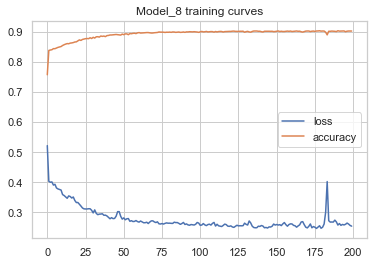

In [97]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

#### On test data we are reaching an accuracy of around 92% and on training data our accuracy is 77% which leads our model to overfitting.